In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import math

Code di atas ini digunakan untuk meng-import beberapa library python yaitu:

numpy (np): Pustaka ini menyediakan dukungan untuk operasi numerik dan manipulasi array multidimensi. Dalam konteks ini, kemungkinan digunakan untuk operasi matematika, pemrosesan gambar, dan manipulasi data.

pandas (pd): Pustaka ini menyediakan struktur data dan alat analisis data yang efisien. Dalam kode ini, mungkin digunakan untuk membaca, memanipulasi, dan menganalisis data tabular dalam format dataframe.

matplotlib.pyplot (plt): Pustaka ini digunakan untuk membuat visualisasi grafik dan plot. Dalam kode ini, mungkin digunakan untuk menampilkan gambar atau grafik terkait analisis data.

cv2: Pustaka ini adalah OpenCV (Open Source Computer Vision Library) yang menyediakan alat dan fungsi untuk pengolahan gambar dan komputer visi. Dalam kode ini, mungkin digunakan untuk membaca, memanipulasi, dan memproses gambar.

os: Modul ini menyediakan fungsi-fungsi untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori. Dalam kode ini, mungkin digunakan untuk melakukan operasi pada file atau direktori, seperti membaca nama file atau mengatur jalur file.

math: Modul ini menyediakan fungsi matematika dasar. Dalam kode ini, mungkin digunakan untuk operasi matematika seperti logaritma atau perhitungan lainnya.

# IMPORT PATH

In [2]:
dataset_dir = "datasets/" 

images = []
labels = []
names = []
count1= count2 = count3= 0

for sub_folder in os.listdir(dataset_dir):
    sub_folder_files = os.listdir(os.path.join(dataset_dir, sub_folder))
    for i, filename in enumerate(sub_folder_files):
        img = cv2.imread(os.path.join(dataset_dir, sub_folder, filename))
        
        if(sub_folder=='WHIMBREL'):
            if(count1<100):
                images.append(img)
                labels.append(sub_folder)
                names.append(filename)
                count1+=1
        elif(sub_folder=='WRENTIT'):
            if(count2<100):            
                images.append(img)
                labels.append(sub_folder)
                names.append(filename)
                count2+=1
        elif(sub_folder=='ZEBRA DOVE'):
            if(count3<100):                
                images.append(img)
                labels.append(sub_folder)
                names.append(filename)
                count3+=1
                
images = np.array(images)
labels = np.array(labels)
names = np.array(names)       

Cod di atas ini digunakan untuk melakukan pengolahan dataset untuk memuat gambar-gambar burung dari direktori "datasets/". Berikut adalah penjelasan singkatnya:

dataset_dir = "datasets/": Variabel dataset_dir menyimpan direktori tempat dataset berada.

images, labels, dan names: Variabel ini digunakan untuk menyimpan gambar, label, dan nama file gambar yang akan digunakan dalam dataset.

count1, count2, count3: Variabel ini digunakan untuk menghitung jumlah gambar yang telah dimasukkan untuk setiap jenis burung. Ini dibutuhkan untuk membatasi jumlah gambar yang dimuat sesuai dengan batas tertentu.

Melakukan iterasi pada setiap sub-folder dalam dataset_dir menggunakan os.listdir(dataset_dir).

Untuk setiap sub-folder, gambar-gambar dalam sub-folder tersebut diambil menggunakan os.listdir(os.path.join(dataset_dir, sub_folder)) dan diberi label sesuai dengan nama sub-folder.

Setiap gambar yang telah dimuat dan diberi label akan ditambahkan ke dalam images, labels, dan names sesuai dengan jenis burungnya. Jumlah gambar untuk setiap jenis burung dibatasi menggunakan variabel count1, count2, dan count3.

Setelah selesai memuat gambar-gambar burung, images, labels, dan names diubah menjadi array NumPy menggunakan np.array() untuk mempermudah pemrosesan lebih lanjut.

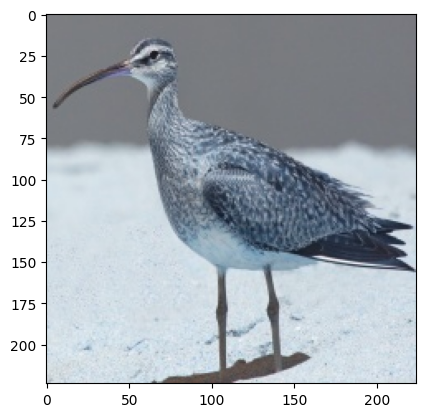

In [3]:
plt.imshow(images[15])

Code di atas ini digunakan untuk menampilkan gambar dengan menggunakan Matplotlib. Pada kasus ini, gambar yang ditampilkan adalah gambar yang berada pada indeks ke-15 dalam array images.

Fungsi plt.imshow() digunakan untuk menampilkan gambar dalam bentuk matriks piksel. Gambar yang ditampilkan akan muncul dalam jendela pop-up atau output grafik, tergantung pada lingkungan pemrograman yang digunakan.

Perintah ini akan menampilkan gambar burung yang ada pada indeks ke-15 dalam array images menggunakan Matplotlib.

# GLCM

In [4]:
def derajat0 (images):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(images)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imgsTmp = np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len(images)): #looping untuk kolom
        for j in range(len(images[i])-1): #looping untuk baris

            #menentukan matrik concurence
            #dimana derajat0 berarti pengambilan nilai piksel kekanan dari piksel asal
            #misalkan jika piksel[0,0] = 1 dan piksel[0,1]=3(dikanannnya piksel[0,0]), maka
            #concurence[1,3] akan ditambah 1 dan seterusnya
            imgsTmp[images[i,j],images[i,j+1]] +=1 
    
    #mentranpos array hasil concurence
    transpos = np.transpose(imgsTmp)

    #menjumlahkan array transpos dengan concurence
    data = imgsTmp+transpos

    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan 
    tmp = 0
    
    #normalisasi
    for i in range (len(data)):
        for j in range(len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]
       
    for i in range(len(data)):
        for j in range(len(data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
            
    #mengembalikan var data
    return data

Code di atas ini merupakan Fungsi derajat0 digunakan untuk menghitung matriks concurrence berdasarkan derajat 0 dari piksel-piksel dalam gambar. Concurrence adalah ukuran statistik yang menggambarkan hubungan antara intensitas piksel-piksel yang berdekatan dalam gambar. Prosesnya melibatkan penghitungan frekuensi kemunculan pasangan piksel dengan derajat 0, di mana piksel kedua berada di sebelah kanan piksel pertama.

Dengan menggunakan fungsi derajat0, kita dapat mengukur hubungan spasial antara piksel-piksel dalam gambar dan menggunakannya sebagai fitur untuk analisis atau pemodelan lebih lanjut.

In [5]:
def derajat45 (images):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(images)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imagesTmp=np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (images)-1):
        for j in range (len (images[i])-1):
            imagesTmp[images[i+1,j],images[i,j+1]] += 1
    
    #mentranpos array hasil concurence
    transpos= np.transpose(imagesTmp)

    #menjumlahkan array transpos dengan concurence
    data= imagesTmp+transpos
    
    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]
            
    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

Code di atas ini merupakan Fungsi derajat45 digunakan untuk menghitung matriks concurrence berdasarkan derajat 45 dari piksel-piksel dalam gambar. Pada derajat 45, pasangan piksel dihitung berdasarkan hubungan antara piksel saat ini dengan piksel diagonal kanan bawahnya.

Fungsi derajat45 dapat digunakan untuk menganalisis hubungan spasial antara piksel-piksel dalam gambar dengan derajat 45 dan menghasilkan fitur yang dapat digunakan dalam analisis atau pemodelan lebih lanjut.

In [6]:
def derajat90 (images):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(images)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imagesTmp=np.zeros([max+1,max+1])

    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (images)-1):
        for j in range (len (images[i])):
            imagesTmp[images[i+1,j],images[i,j]] += 1
            
    #mentranpos array hasil concurence
    transpos= np.transpose(imagesTmp)

    #menjumlahkan array transpos dengan concurence
    data= imagesTmp+transpos
    
    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]
            
    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

Code di atas ini merupakan Fungsi derajat90 digunakan untuk menghitung matriks concurrence berdasarkan derajat 90 dari piksel-piksel dalam gambar. Pada derajat 90, pasangan piksel dihitung berdasarkan hubungan antara piksel saat ini dengan piksel di atasnya dalam kolom yang sama.

Fungsi derajat90 dapat digunakan untuk menganalisis hubungan spasial antara piksel-piksel dalam gambar dengan derajat 90 dan menghasilkan fitur yang dapat digunakan dalam analisis atau pemodelan lebih lanjut.

In [7]:
def derajat135 (images):

    #mencari nilai terbesar atau tertinggi dari piksel image
    max = np.max(images)

    #membuat array kosong yang nantinya digunakan untuk menampung hasil concurence dari image
    imagesTmp=np.zeros([max+1,max+1])
    
    #looping agar dapat mengolah semua piksel pada gambar
    for i in range (len (images)-1):
        for j in range (len (images[i])-1):
            imagesTmp[images[i,j],images[i+1,j+1]] += 1
            
    #mentranpos array hasil concurence
    transpos= np.transpose(imagesTmp)

    #menjumlahkan array transpos dengan concurence
    data= imagesTmp+transpos
    
    #membuat var yang nantinya digunakan untuk menyimpan hasil penjumlahan
    tmp=0
    
    #normalisasi
    for i in range (len(data)):
        for j in range (len(data)):
            #menambahkan semua piksel pada var data
            tmp+=data[i,j]
            
    for i in range (len (data)):
        for j in range (len (data)):
            #membagi data dengan hasil penambahan tadi
            data[i,j]/=tmp
    #mengembalikan var data
    return data

Code di atas ini merupakan Fungsi derajat135 digunakan untuk menghitung matriks concurrence berdasarkan derajat 135 dari piksel-piksel dalam gambar. Pada derajat 135, pasangan piksel dihitung berdasarkan hubungan antara piksel saat ini dengan piksel di diagonal kanan bawahnya.

Fungsi derajat135 dapat digunakan untuk menganalisis hubungan spasial antara piksel-piksel dalam gambar dengan derajat 135 dan menghasilkan fitur yang dapat digunakan dalam analisis atau pemodelan lebih lanjut.

In [8]:
def dissimilarity(data): 
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)): 
        for j in range(len(data)):

            #rumus : p(x,y)+|i-j|
            simpan+= data[i,j]+abs(i-j)
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi dissimilarity digunakan untuk menghitung nilai dissimilarity dari matriks concurrence. Dissimilarity mengukur perbedaan atau ketidaksamaan antara pasangan piksel dalam gambar.

In [9]:
def ASM(data): 
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):

            #rumus : p(x,y)^2
            simpan+= pow(data[i,j],2)
    #mengembalikan nilai var simpan
    return simpan 

Code di atas ini merupakan Fungsi ASM digunakan untuk menghitung Angular Second Moment (ASM) dari matriks concurrence yang diberikan. ASM mengukur kehalusan atau keteraturan tekstur dalam gambar.

In [10]:
def contrast(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):

            #rumus : p(x,y)+(i-j)^2
            simpan+= data[i,j]+pow(i-j,2)
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi contrast digunakan untuk menghitung kontras dari matriks concurrence yang diberikan. Kontras mengukur perbedaan intensitas antara piksel-piksel dalam gambar.

In [11]:
def entropi(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i,j] > 0:
                #rumus : -(p(x,y)*log^2(i-j)
                simpan+= -(data[i,j] * math.log2(data[i,j]))
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi entropi digunakan untuk menghitung nilai Entropi dari matriks concurrence yang diberikan. Entropi menggambarkan tingkat ketidakpastian atau kompleksitas distribusi intensitas dalam gambar.

In [12]:
def energy(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            #rumus : sqrt(p(x,y)^2) atau sqrt(ASM)
            simpan+=pow(data[i,j],2)
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi energy digunakan untuk menghitung nilai Energy dari matriks concurrence yang diberikan. Energy merupakan ukuran dari jumlah energi atau kekuatan tekstur dalam gambar.

In [13]:
def homogenitas(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            #rumus : p(x,y)/1+(i-j)^2
            simpan+=data[i,j]/(1+pow((i-j),2))
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi homogenitas digunakan untuk menghitung nilai Homogeneity dari matriks concurrence yang diberikan. Homogeneity menggambarkan sejauh mana distribusi intensitas tekstur yang seragam dalam gambar.

In [14]:
def correlation(data,mI,mJ,tI,tJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+=((i-mI)*(j-mJ)*data[i,j])/(tI*tJ)
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi correlation digunakan untuk menghitung nilai Correlation dari matriks concurrence yang diberikan. Correlation menggambarkan sejauh mana hubungan linier antara intensitas tekstur dalam gambar.

In [15]:
def meanI(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= i * data[i,j]
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi meanI digunakan untuk menghitung nilai mean intensitas (meanI) dari matriks concurrence yang diberikan.

In [16]:
def meanJ(data):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= j * data[i,j]
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi meanJ digunakan untuk menghitung nilai mean kolom (meanJ) dari matriks concurrence yang diberikan.

In [17]:
def taoI(data,mI):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((i-mI),2)*data[i,j]
    
    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi taoI digunakan untuk menghitung nilai taoI (standard deviation of intensity) dari matriks concurrence yang diberikan, berdasarkan nilai mean intensitas (mI).

In [18]:
def taoJ(data,mJ):
    simpan = 0 #membuat var simpan yang nantinya digunakan untuk menyimpan hasil
    for i in range (len(data)):
        for j in range(len(data)):
            simpan+= pow((j-mJ),2)*data[i,j]
    #mengakarkan var simpan
    simpan = math.sqrt(simpan)
    #mengembalikan nilai var simpan
    return simpan

Code di atas ini merupakan Fungsi taoJ digunakan untuk menghitung nilai taoJ (standard deviation of j) dari matriks concurrence yang diberikan, berdasarkan nilai mean j (mJ).

In [19]:
hasil = []
for i in range(len(images)):
    dat = []
    dat.append(derajat0 (images[i]))      #mencari piksel derajat0
    dat.append(derajat45 (images[i]))     #mencari piksel derajat45
    dat.append(derajat90 (images[i]))     #mencari piksel derajat90
    dat.append(derajat135 (images[i]))    #mencari piksel derajat135
    hasil.append(dat)

Code di atas merupakan sebuah loop yang mengiterasi setiap gambar dalam array images dan melakukan perhitungan untuk masing-masing gambar. Setiap gambar diproses menggunakan empat fungsi yang telah didefinisikan sebelumnya, yaitu derajat0, derajat45, derajat90, dan derajat135. Hasil dari setiap perhitungan disimpan dalam variabel hasil.

In [20]:
frame = []
indeks = 0 #digunakan untuk menentukan indeks dari nama filenya
for i in hasil:
    save = []
    #untuk menginputkan nama dari file
    save.append(names[indeks])
    indeks+=1
    for j in i:

        #memanggil fungsi energy
        en = energy(j)
        #menginputkan kedalam var save
        save.append(en)
        
        #memanggil fungsi homogenitas
        hm = homogenitas(j)
        #menginputkan kedalam var save
        save.append(hm)
        
        #memanggil fungsi entropi
        ent = entropi(j)
        #menginputkan kedalam var save
        save.append(ent)
        
        #memanggil fungsi contrast
        con = contrast(j)
        #menginputkan kedalam var save
        save.append(con)

        #memanggil fungsi dissimilarity
        dis = dissimilarity(j)
        #menginputkan kedalam var save
        save.append(dis)

        #memanggil fungsi ASM
        asm = ASM(j)
        #menginputkan kedalam var save
        save.append(asm)
        
        mI = meanI(j)
        mJ = meanJ(j)
        tI = taoI(j,mI)
        tJ = taoJ(j,mJ)
        
        #memanggil fungsi correlation
        cor = correlation(j,mI,mJ,tI,tJ)
        #menginputkan kedalam var save
        save.append(cor)
        
    #menginputkan isi var save ke var frame
    frame.append(save)

Code di atas merupakan sebuah loop yang mengiterasi setiap hasil perhitungan concurrence dari masing-masing gambar dalam variabel hasil. Loop tersebut akan menghitung beberapa fitur tekstur berdasarkan matriks concurrence dan menyimpan hasilnya dalam variabel frame.

In [21]:
#membuat var yang nantinya digunakan sebagai header
headerPass = ['path','energi0','homogenitas0','entropy0','contras0','dissimilarity0','ASM0','correlation0'
           ,'energi45','homogenitas45','entropy45','contras45','dissimilarity45','ASM45','correlation45'
           ,'energi90','homogenitas90','entropy90','contras90','dissimilarity90','ASM90','correlation90'
           ,'energi135','homogenitas135','entropy135','contras135','dissimilarity135','ASM135','correlation135']
#menginputkan var frame sebagai isi dari tabel
df = pd.DataFrame(frame, columns=headerPass)

Code di atas digunakan untuk membuat header dan mengonversi hasil fitur tekstur dalam variabel frame menjadi sebuah tabel pandas. Variabel headerPass berisi daftar nama kolom yang akan digunakan sebagai header tabel. Selanjutnya, menggunakan pd.DataFrame, frame dijadikan isi dari tabel dengan kolom-kolom yang sesuai dengan headerPass. Hasilnya disimpan dalam variabel df, yang merupakan objek DataFrame pandas yang berisi tabel dengan fitur-fitur tekstur.

In [22]:
#digunakan untuk mensave data menjadi file csv dengan nama Jurnalmodul8
df['labels'] = labels
df.to_csv('dataset1.csv', index=False)

Code di atas digunakan untuk menambahkan kolom 'labels' ke DataFrame df, yang berisi label-label dari data gambar. Kemudian, DataFrame tersebut disimpan ke dalam file CSV dengan nama 'dataset1.csv' menggunakan metode to_csv(). Parameter index=False digunakan untuk tidak menyertakan indeks dalam file CSV yang dihasilkan.

In [23]:
df

,path,energi0,homogenitas0,entropy0,contras0,dissimilarity0,ASM0,correlation0,energi45,homogenitas45,...,ASM90,correlation90,energi135,homogenitas135,entropy135,contras135,dissimilarity135,ASM135,correlation135,labels
0,001.jpg,0.000194,0.170211,12.963168,6.721158e+08,5.334253e+06,0.000194,0.942636,0.000141,0.128192,...,0.000179,0.941605,0.000145,0.126508,13.294618,6.721158e+08,5.334253e+06,0.000145,0.921499,WHIMBREL
1,002.jpg,0.000316,0.164026,12.500038,5.169981e+08,4.381341e+06,0.000316,0.924578,0.000263,0.134680,...,0.000379,0.919564,0.000259,0.132027,12.858686,5.169981e+08,4.381341e+06,0.000259,0.864844,WHIMBREL
2,003.jpg,0.005178,0.405099,9.557777,2.886416e+08,2.829821e+06,0.005178,0.972577,0.003567,0.313183,...,0.004100,0.961627,0.003338,0.297453,10.219217,2.886416e+08,2.829821e+06,0.003338,0.942982,WHIMBREL
3,004.jpg,0.012162,0.539957,9.037738,7.158170e+08,5.592321e+06,0.012162,0.950475,0.009946,0.489235,...,0.013394,0.950408,0.009960,0.487698,9.309575,7.158170e+08,5.592321e+06,0.009960,0.920344,WHIMBREL
4,005.jpg,0.000528,0.269089,12.332282,6.203395e+08,5.022993e+06,0.000528,0.945871,0.000295,0.169609,...,0.000341,0.930130,0.000299,0.170891,12.887271,6.203395e+08,5.022993e+06,0.000299,0.907454,WHIMBREL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,31.jpg,0.001441,0.312956,12.333718,7.158170e+08,5.592321e+06,0.001441,0.916312,0.001181,0.271864,...,0.001530,0.924106,0.001215,0.276573,12.595129,7.158170e+08,5.592321e+06,0.001215,0.866722,ZEBRA DOVE
296,32.jpg,0.000658,0.244078,11.741577,7.158170e+08,5.592321e+06,0.000658,0.834560,0.000583,0.217358,...,0.000700,0.904623,0.000566,0.213962,11.947147,7.158170e+08,5.592321e+06,0.000566,0.836171,ZEBRA DOVE
297,33.jpg,0.000309,0.141892,12.516960,7.158170e+08,5.592321e+06,0.000309,0.845955,0.000264,0.119507,...,0.000327,0.849834,0.000267,0.121380,12.740013,7.158170e+08,5.592321e+06,0.000267,0.771233,ZEBRA DOVE
298,34.jpg,0.001145,0.389177,12.072558,7.158170e+08,5.592321e+06,0.001145,0.964065,0.000888,0.295158,...,0.000995,0.946853,0.000864,0.286320,12.635962,7.158170e+08,5.592321e+06,0.000864,0.933531,ZEBRA DOVE


Code di atas digunakan untuk menampilkan data yang sudah disimpan dalam file csv.